In [208]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold ,train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



In [209]:
df = pd.read_csv('Data/colon-dataset-processed.csv')
df

,Class,Age,p16540_C/C,p16540_G/C,p16540_G/G,p16580_C/C,p16580_C/T,p16580_T/T,mdm2_G/G,mdm2_G/T,mdm2_T/T,GAL3_A/A,GAL3_C/A,GAL3_C/C,TIM1_C/C,TIM1_G/C,TIM1_G/G
0,healthy,49,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False
1,healthy,49,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
2,healthy,49,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False
3,healthy,36,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False
4,healthy,49,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,diagnosed,81,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True
111,diagnosed,73,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True
112,diagnosed,56,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False
113,diagnosed,74,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True


In [210]:
df.isnull().sum()

Class         0
Age           0
p16540_C/C    0
p16540_G/C    0
p16540_G/G    0
p16580_C/C    0
p16580_C/T    0
p16580_T/T    0
mdm2_G/G      0
mdm2_G/T      0
mdm2_T/T      0
GAL3_A/A      0
GAL3_C/A      0
GAL3_C/C      0
TIM1_C/C      0
TIM1_G/C      0
TIM1_G/G      0
dtype: int64

In [211]:
data=df.drop(['Class'],axis=1)
target=df['Class']

In [212]:
target.value_counts()

diagnosed    65
healthy      50
Name: Class, dtype: int64

In [213]:

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3,random_state=123)

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

clf = LogisticRegression()
clf.fit(X_train_res, y_train_res)
print("Accuracy: %.2f%%" % (clf.score(X_test, y_test) * 100.0))



Accuracy: 82.86%


In [214]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   diagnosed       0.88      0.78      0.82        18
     healthy       0.79      0.88      0.83        17

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35



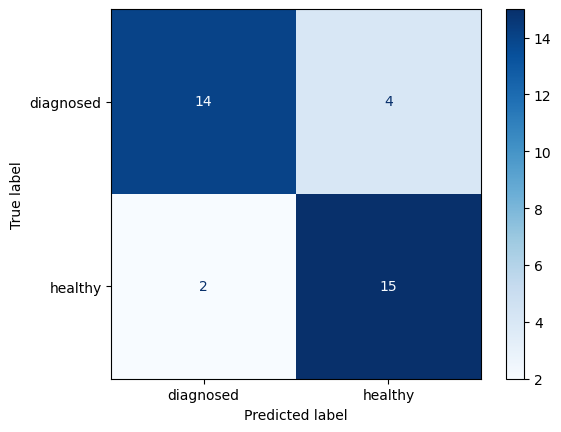

In [215]:
# Plot the confusion matrix
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [216]:
logreg = LogisticRegression()

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}
grid_search = GridSearchCV(logreg, param_grid, cv=KFold(n_splits=5, random_state=0, shuffle=True), scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [217]:

# Print the best parameters and their corresponding accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: %.2f%% " % (grid_search.best_score_*100.0))

# Evaluate on the test set
y_pred = grid_search.predict(X_test)
print("Accuracy of Best model: %.2f%%" % (grid_search.score(X_test, y_test) * 100.0))


Best parameters found: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation accuracy: 88.30% 
Accuracy of Best model: 85.71%


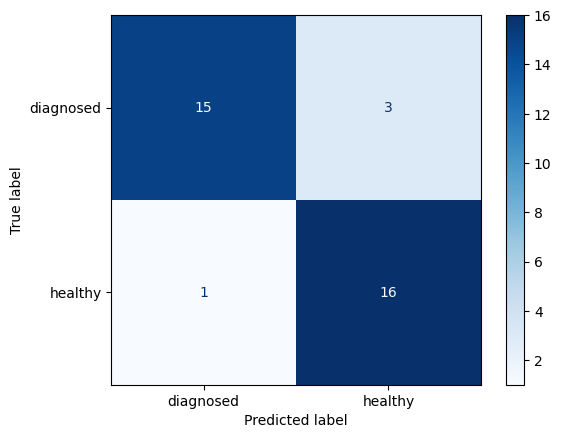

In [218]:
y_pred1= best_lr_model.predict(X_test)
cm=confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()